# 項目：視覺化帕默群島企鵝數據

## 分析目標

此數據分析報告的目的是對帕默群島上企鵝樣本的相關變量進行視覺化，以探索和分析種類、性別、所在島嶼等因素與企鵝的身體屬性（包括體重、嘴峰長度與深度、鰭的長度）之間的關係。

## 簡介

原始數據 `Penguins.csv` 包括 334 個收集自南極洲帕爾默群島上 3 個島嶼的企鵝樣本，以及與企鵝相關的屬性數據，包括種類名稱、所在島嶼、嘴峰長度、嘴峰深度、鰭長度、體重及性別。

`Penguins.csv` 每列的含義如下：
- **species**：企鵝的種類
- **island**：企鵝所在的島嶼
- **culmen_length_mm**：企鵝嘴峰的長度（單位為毫米）
- **culmen_depth_mm**：企鵝嘴峰的深度（單位為毫米）
- **flipper_length_mm**：企鵝鰭的長度（單位為毫米）
- **body_mass_g**：企鵝的體重（單位為克）
- **sex**：企鵝的性別

### 讀取數據

導入數據分析所需的庫，並通過 Pandas 的 `read_csv` 函數，將原始數據文件 `Penguins.csv` 裡的數據內容解析為 DataFrame，並賦值給變量 `original_data`。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_data = pd.read_csv("Penguins.csv")
original_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## 評估和清理數據

在這一部分中，我們將對上一部分建立的 `original_data` DataFrame 所包含的數據進行評估和清理。

主要從兩個方面進行：結構和內容，即整齊度和乾淨度。

數據的結構性問題是指不符合「每個變量為一列，每個觀察值為一行，每種類型的觀察單位為一個表格」這三個標準；數據的內容性問題包括存在遺失數據、重複數據、無效數據等。

為了區分經過清理的數據與原始數據，我們創建一個新的變量 `cleaned_data`，讓它為 `original_data` 的副本。我們之後的清理步驟都將應用於 `cleaned_data`。

In [3]:
cleaned_data = original_data.copy()

### 數據整齊度

In [4]:
cleaned_data.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


從前 10 行數據來看，數據符合「每個變量為一列，每個觀察值為一行，每種類型的觀察單位為一個表格」，因此不存在結構性問題。

### 數據的乾淨度

接下來通過 `info` 方法，對數據內容進行大致了解。

In [5]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


從輸出結果來看，`cleaned_data` 數據共有 344 條觀察值，`culmen_length_mm`、`culmen_depth_mm`、`flipper_length_mm`、`body_mass_g` 變量存在缺失值，這些問題將在後續進行評估和清理。

在數據類型方面，我們已知 `species`（企鵝種類）、`sex`（企鵝性別）、`island`（企鵝所在島嶼）都是分類數據，因此可以將這些變量的數據類型轉換為 `Category`。

In [6]:
cleaned_data['species'] = cleaned_data['species'].astype("category")
cleaned_data['sex'] = cleaned_data['sex'].astype("category")
cleaned_data['island'] = cleaned_data['island'].astype("category")

In [7]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                334 non-null    category
dtypes: category(3), float64(4)
memory usage: 12.3 KB


### 處理缺失值

從 `info` 方法的輸出來看，在 `cleaned_data` 中，`culmen_length_mm`、`culmen_depth_mm`、`flipper_length_mm`、`body_mass_g`、`sex` 變量存在缺失值。

先提取出缺失這些變量的觀察值進行查看。

In [8]:
cleaned_data.query("culmen_length_mm.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [9]:
cleaned_data.query("culmen_depth_mm.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [10]:
cleaned_data.query("flipper_length_mm.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [11]:
cleaned_data.query("body_mass_g.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


以上可以看到索引為 3 和 339 的觀察值，除了種類和所屬島嶼外，所有變量都為空，無法為探索企鵝身體屬性相關因素提供價值，因此可以直接刪除這兩行。

In [12]:
cleaned_data.drop(3, inplace=True)
cleaned_data.drop(339, inplace=True)

In [13]:
cleaned_data.query("sex.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


缺失性別變量的觀察值具備其他數據，仍然可以為分析提供價值。由於 Pandas 以及 Matplotlib、Seaborn 會自動忽略缺失值，因此可以保留這些行。

### 處理重複數據

根據數據變量的含義及內容來看，允許變量重複，因此無需檢查此數據是否存在重複值。

### 處理不一致數據

不一致數據可能存在於所有分類變量中，我們需要查看是否存在不同值實際指代同一目標的情況。

In [14]:
cleaned_data["species"].value_counts()

Adelie       151
Gentoo       123
Chinstrap     68
Name: species, dtype: int64

In [15]:
cleaned_data["island"].value_counts()

Biscoe       167
Dream        124
Torgersen     51
Name: island, dtype: int64

In [16]:
cleaned_data["sex"].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

從以上輸出來看，`species` 和 `island` 列中並不存在不一致數據，但 `sex` 列中存在一個英文句號值，並不代表任何有效性別。我們應當將該值替換為 `NaN` 空值。

In [17]:
cleaned_data['sex'] = cleaned_data['sex'].replace(".", np.nan)

查看英文句號值是否還存在。

In [18]:
cleaned_data["sex"].value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

英文句號值已被替換為空值，因此 `sex` 列中不存在不一致數據。

### 處理無效或是錯誤的數據

可以通過 DataFrame 的 `describe` 方法，快速瞭解數值型數據的統計信息。

In [19]:
cleaned_data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


從以上統計資訊來看，`cleaned_house_price` 中不存在脫離現實意義的數值。

### 數據探索

我們將通過數據視覺化進行探索和分析，從圖表中獲取企鵝樣本數據的相關洞察。

In [20]:
sns.set_palette("pastel")

In [21]:
cleaned_data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### 企鵝種類比例

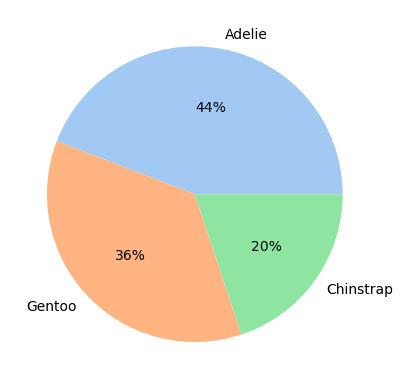

In [22]:
species_count = cleaned_data["species"].value_counts()
plt.pie(species_count, autopct='%.0f%%', labels=species_count.index)
plt.show()

樣本中，`Adelie` 這個種類的企鵝占比最大，`Gentoo` 種類次之，`Chinstrap` 的占比最小，約為 1/5。

### 企鵝所屬島嶼比例

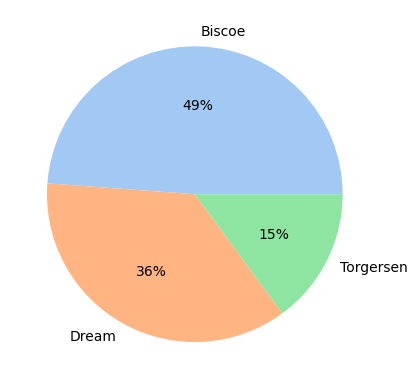

In [23]:
island_count = cleaned_data["island"].value_counts()
plt.pie(island_count, autopct='%.0f%%', labels=island_count.index)
plt.show()

樣本中約一半的企鵝樣本來自 `Biscoe` 島嶼，占比最大，其次是 `Dream` 島嶼，而來自 `Torgersen` 島嶼的樣本最少。

### 企鵝性別比例

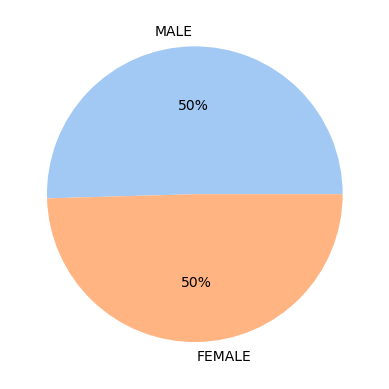

In [24]:
sex_count = cleaned_data['sex'].value_counts()
plt.pie(sex_count, labels=sex_count.index, autopct='%.0f%%')
plt.show()

樣本中企鵝的性別占比持平，符合隨機抽樣。

### 不同島上的企鵝種類數量

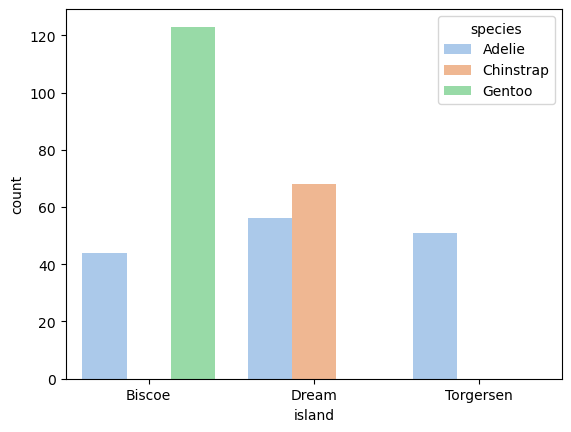

In [25]:
sns.countplot(cleaned_data, x="island", hue="species")
plt.show()

從以上可以看出，`Adelie` 種類的企鵝樣本分佈在 `Biscoe`、`Dream` 和 `Torgersen` 這三個島嶼，而 `Chinstrap` 種類僅出現在 `Dream` 島上，`Gentoo` 種類僅出現在 `Biscoe` 島上。

### 不同島上的企鵝性別數量

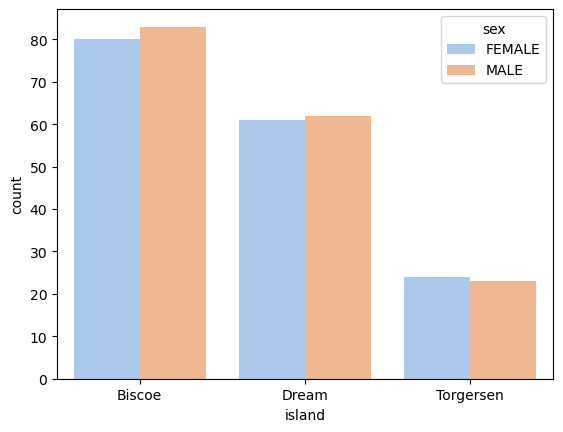

In [26]:
sns.countplot(cleaned_data, x='island', hue='sex')
plt.show()

### 查看數值之間的相關關係

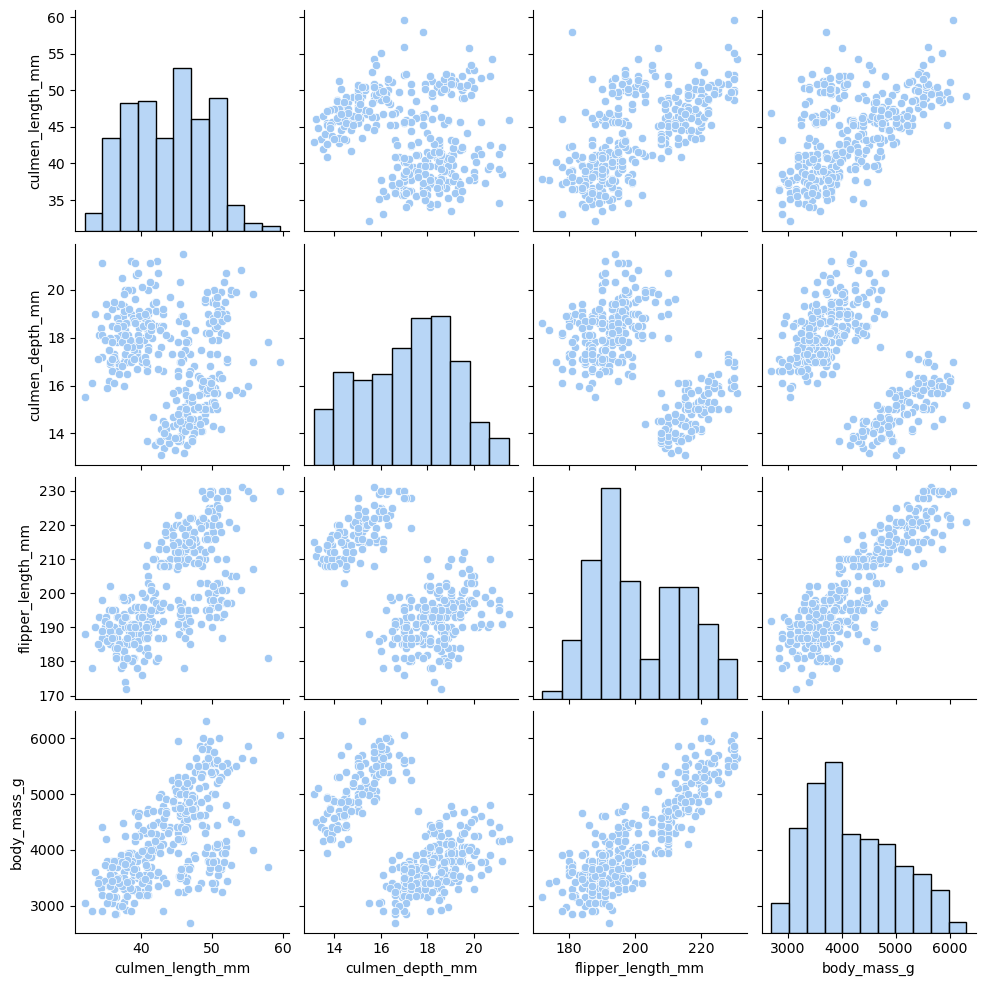

In [27]:
sns.pairplot(cleaned_data)
plt.show()

從直方圖來看，企鵝樣本的嘴峰長度、嘴峰深度、鰭長度、體重的分佈並非正態分佈。一方面說明這裡可能包含了多組存在差異的樣本數據，另一方面也說明樣本數不足夠大。

另外，從散點圖中可以看出明顯的多個集群，這可能與某些因素有關，比如企鵝的種類或性別。因此，可以進一步進行分類對比分析。

### 根據種類查看數值之間的關係

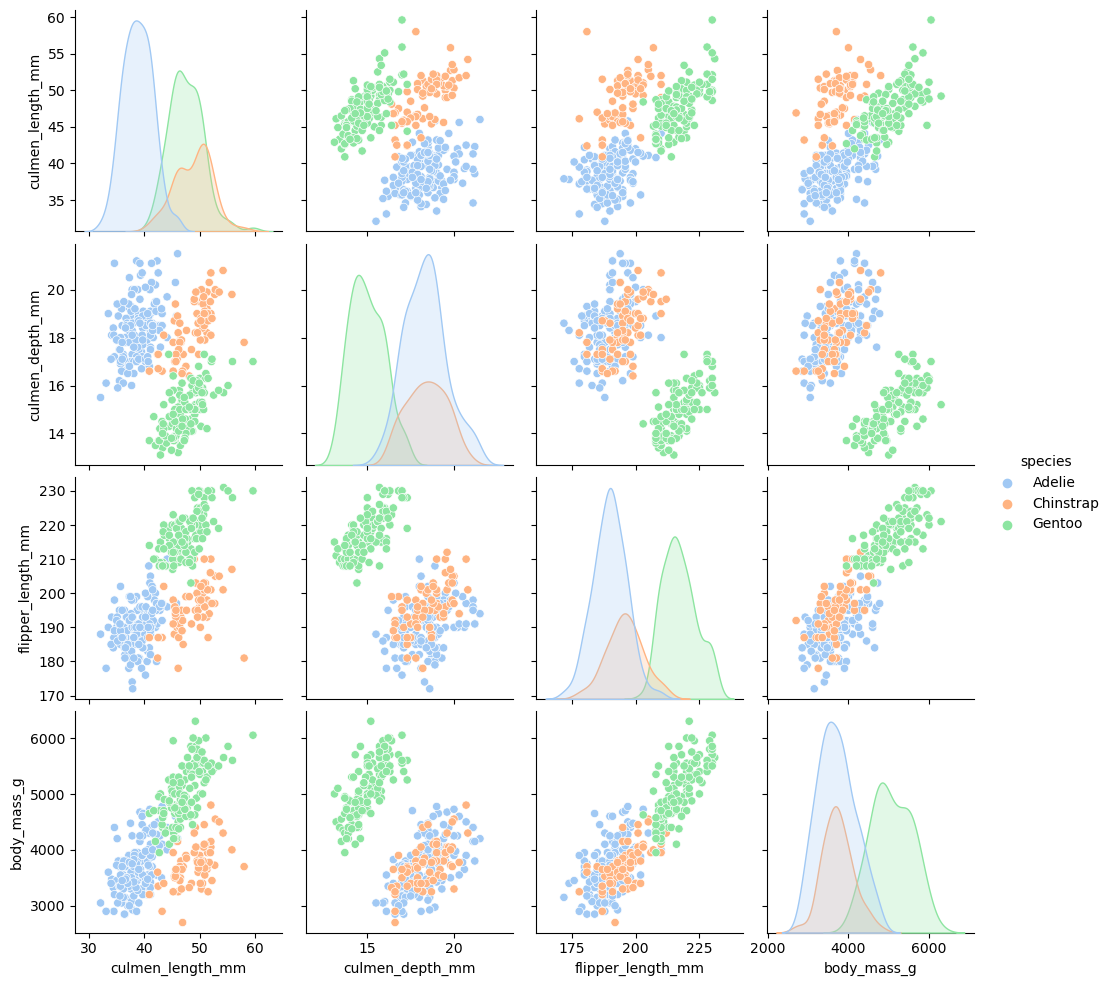

In [28]:
sns.pairplot(cleaned_data, hue='species')
plt.show()

同一種類的企鵝樣本數據在散點圖上基本聚在一起，這說明同一種類的企鵝在嘴峰長度、嘴峰深度、鰭長度、體重之間的關係上存在相似性。這些發現有助於我們根據體重、鰭長等數值推測企鵝的種類，也可以根據企鵝的種類推測其體重、鰭長等數值。

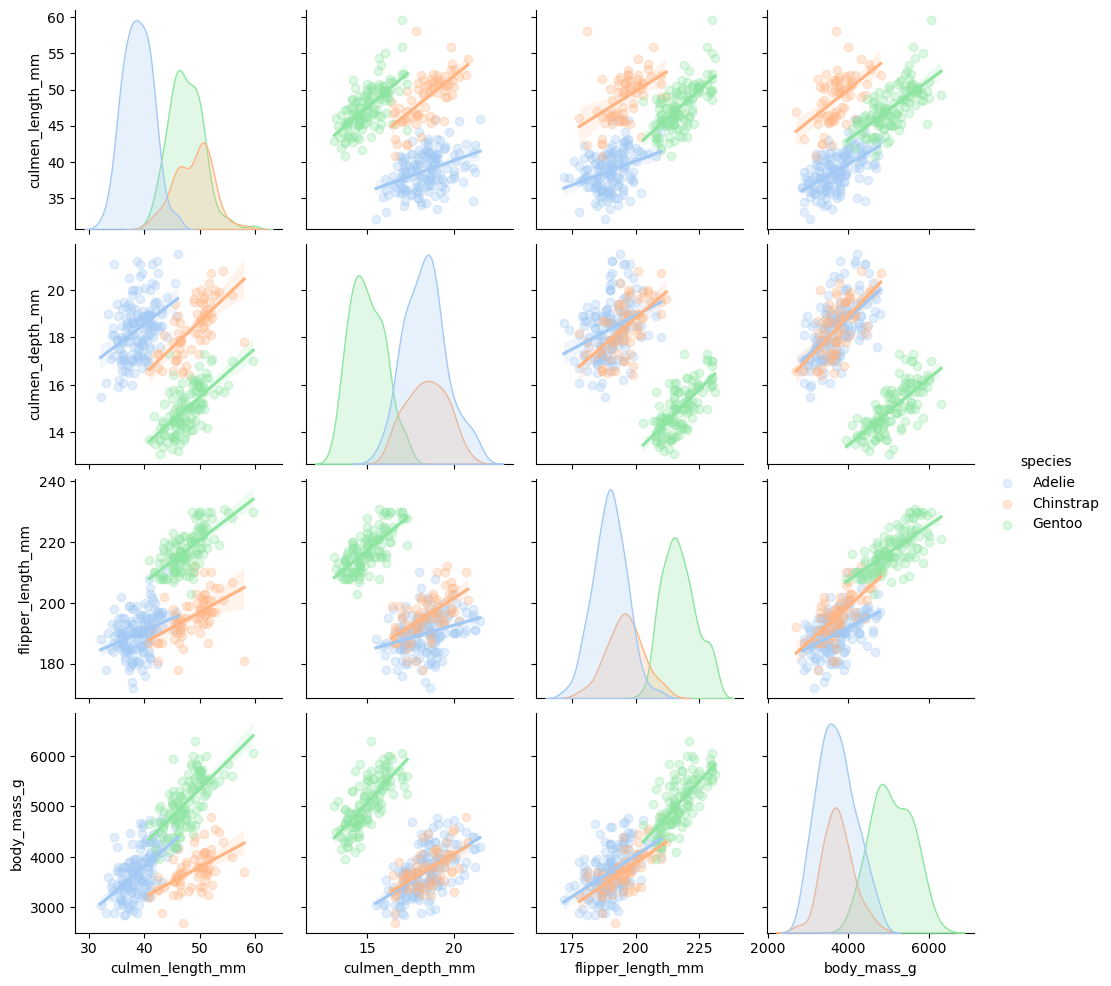

In [29]:
sns.pairplot(cleaned_data, hue='species', kind='reg', plot_kws={'scatter_kws': {'alpha': 0.3}})
plt.show()

從散點圖結合線性回歸線來看，同類企鵝的屬性數據之間均呈現線性正相關關係。也就是說，嘴峰越長，嘴峰越深，鰭越長，體重越重；相反，嘴峰越短，嘴峰越淺，鰭越短，體重越輕。

從密度圖的分佈來看，可以得出以下關於樣本的發現：

- **嘴峰長度**：Chinstrap 和 Gentoo 的嘴峰長度範圍較為接近，而 Adelie 的嘴峰長度更短。
- **嘴峰深度**：Adelie 和 Chinstrap 的嘴峰深度範圍較為接近，而 Gentoo 的嘴峰深度更淺。
- **鰭長度**：Adelie 的鰭長度最短，Chinstrap 居中，而 Gentoo 的鰭長度最長。
- **體重**：Adelie 和 Chinstrap 的體重範圍較為接近，而 Gentoo 的體重更大。

但不同種類的屬性數值是否存在統計顯著性差異，仍需進行假設檢驗後才能得出結論。

### 根據性別查看數值之間的關係

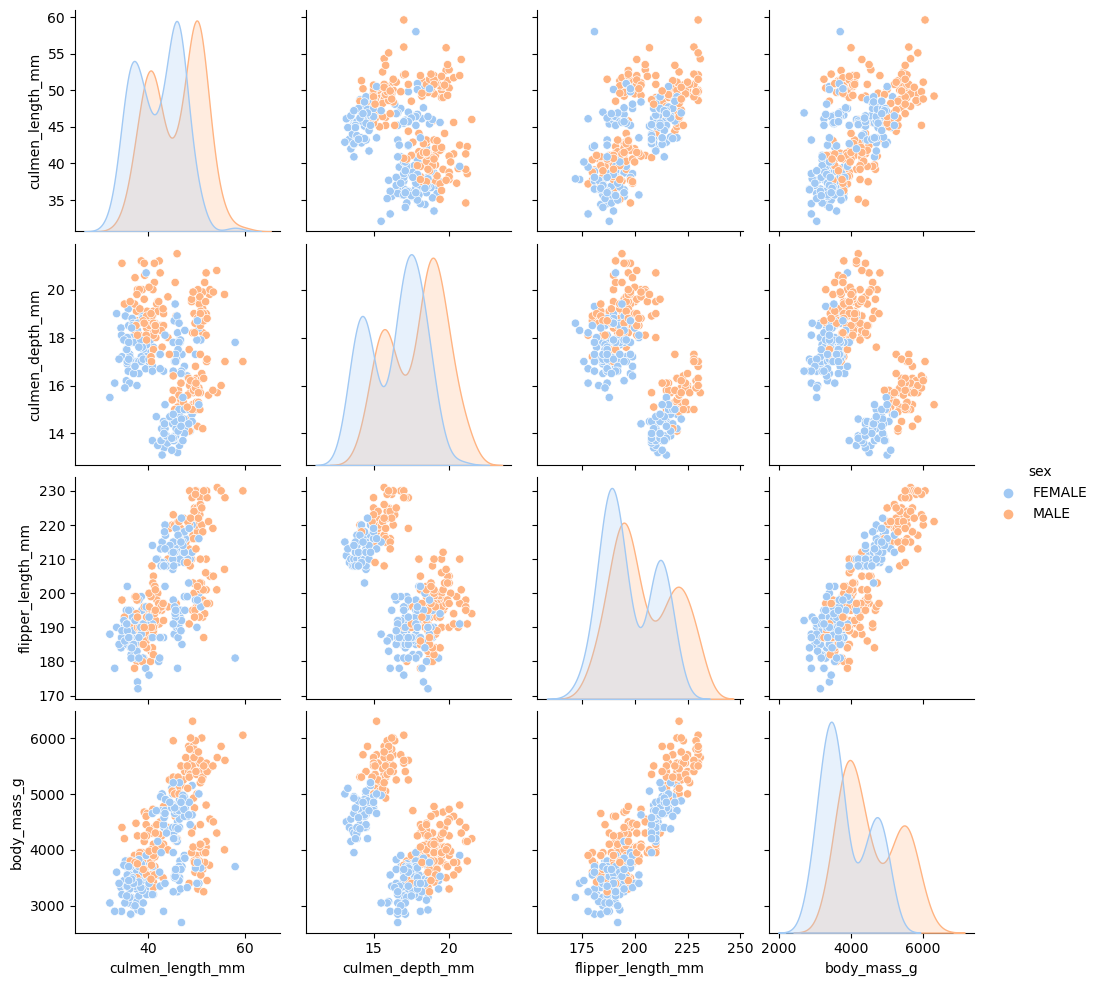

In [30]:
sns.pairplot(cleaned_data, hue='sex')
plt.show()

根據性別劃分後可以看出，樣本中雄性企鵝在各項屬性數值方面均大於雌性企鵝。